In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

ModuleNotFoundError: No module named 'tensorflow.compiler.jit'

In [2]:
base_dir = "./im-somewhat-of-a-cybersecurity-analyst-myself"
train_dir  = os.path.join(base_dir,'training/uploads')
test_dir = os.path.join(base_dir,'test.csv')

In [3]:
ls = os.listdir(train_dir)
len(ls)

50

In [4]:
train_df = pd.read_csv(os.path.join(train_dir,"fold_0.csv"))
for i in range(1,50):
    s = pd.read_csv(os.path.join(train_dir,"fold_"+str(i)+".csv"))
    train_df = pd.concat([train_df,s])

train_df.to_csv("train_combine.csv")

C:\Users\reach\AppData\Local\Temp\ipykernel_3396\489191697.py:3: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  s = pd.read_csv(os.path.join(train_dir,"fold_"+str(i)+".csv"))
C:\Users\reach\AppData\Local\Temp\ipykernel_3396\489191697.py:3: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  s = pd.read_csv(os.path.join(train_dir,"fold_"+str(i)+".csv"))
C:\Users\reach\AppData\Local\Temp\ipykernel_3396\489191697.py:3: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  s = pd.read_csv(os.path.join(train_dir,"fold_"+str(i)+".csv"))
C:\Users\reach\AppData\Local\Temp\ipykernel_3396\489191697.py:3: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  s = pd.read_csv(os.path.join(train_dir,"fold_"+str(i)+".csv"))
C:\Users\reach\AppData\Local\Temp\ipykernel_3396\489191697.py:3: DtypeWarnin

In [5]:
train_df = pd.read_csv("train_combine.csv")

C:\Users\reach\AppData\Local\Temp\ipykernel_3396\3246655068.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("train_combine.csv")


In [6]:
train_df.drop(['machine_id','Unnamed: 0'],axis=1, inplace = True)
train_df.head()

,security_product_name,machine_version,app_version,av_sig_version,is_beta,rtp_state,is_sxs_passive,default_browser,av_status,av_prod_installed,...,wim_boot_status,virtual_dev_status,touch_support,pen_support,aoac_support,is_gamer,region_id,malware_status,age,sex
0,win8defender,1.1.15100.1,4.18.1806.18062,1.273.493.0,0,7.0,0,NaN,53447.0,1.0,...,0.0,0.0,0,0,0.0,0.0,10.0,1,31.713231,Male
1,win8defender,1.1.15200.1,4.18.1807.18075,1.275.36.0,0,7.0,0,NaN,53447.0,1.0,...,NaN,0.0,0,0,0.0,1.0,11.0,0,40.099499,Female
2,win8defender,1.1.15200.1,4.18.1807.18075,1.275.26.0,0,7.0,0,NaN,53447.0,1.0,...,NaN,0.0,0,0,0.0,1.0,15.0,0,35.350487,Female
3,win8defender,1.1.15100.1,4.18.1806.18062,1.273.241.0,0,7.0,0,NaN,53447.0,1.0,...,0.0,0.0,0,0,0.0,0.0,10.0,1,42.771937,Male
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1749.0,0,7.0,0,NaN,53447.0,1.0,...,NaN,0.0,0,0,0.0,0.0,10.0,0,40.323890,Male


In [7]:
test_df = pd.read_csv(os.path.join(test_dir,'test.csv'))
test_df

C:\Users\reach\AppData\Local\Temp\ipykernel_3396\976817395.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv(os.path.join(test_dir,'test.csv'))


,machine_id,security_product_name,machine_version,app_version,av_sig_version,is_beta,rtp_state,is_sxs_passive,default_browser,av_status,...,secure_boot_status,wim_boot_status,virtual_dev_status,touch_support,pen_support,aoac_support,is_gamer,region_id,age,sex
0,5000000,win8defender,1.1.14202.0,4.10.14393.0,1.253.475.0,0,7.0,0,1950.0,40645.0,...,0,0.0,0.0,0,0,0.0,1.0,7.0,35.293140,Female
1,5000001,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1504.0,0,7.0,0,NaN,53447.0,...,1,NaN,0.0,1,0,0.0,1.0,1.0,43.272553,Female
2,5000002,win8defender,1.1.15200.1,4.9.10586.0,1.275.948.0,0,7.0,0,NaN,53447.0,...,0,0.0,0.0,0,0,0.0,1.0,11.0,39.919912,Male
3,5000003,win8defender,1.1.15100.1,4.10.14393.0,1.273.995.0,0,7.0,0,NaN,52652.0,...,1,NaN,0.0,0,0,0.0,0.0,11.0,31.530633,Male
4,5000004,win8defender,1.1.15200.1,4.18.1807.18075,1.275.590.0,0,7.0,0,NaN,53447.0,...,0,NaN,0.0,0,0,0.0,0.0,10.0,37.780459,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3921478,8921478,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,0,NaN,0.0,0,0,0.0,NaN,NaN,43.301417,Female
3921479,8921479,win8defender,1.1.15300.6,4.18.1807.18075,1.277.46.0,0,7.0,0,NaN,53447.0,...,0,NaN,0.0,1,0,1.0,0.0,5.0,44.406877,Female
3921480,8921480,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1749.0,0,7.0,0,NaN,53447.0,...,0,NaN,0.0,0,0,0.0,0.0,7.0,48.485452,Female
3921481,8921481,win8defender,1.1.14901.4,4.16.17656.18052,1.269.1501.0,0,7.0,0,NaN,43927.0,...,0,NaN,0.0,0,0,0.0,0.0,3.0,35.911994,Male


In [8]:
for i in train_df.columns:
    print(i,train_df[i].isnull().sum())

security_product_name 0
machine_version 0
app_version 0
av_sig_version 0
is_beta 0
rtp_state 18123
is_sxs_passive 0
default_browser 4757081
av_status 20329
av_prod_installed 20329
av_prod_enabled 20329
has_tpm 0
country_id 0
city_id 182026
org_id 1543800
geo_id 109
local_name_id 0
platform 0
processor 0
os_version 0
os_build 0
os_suite 0
os_ptfm_sub_release 0
os_build_lab 13
sku_edition 0
is_protected 20235
auto_sample_opt_in 0
pua_mode 4998706
s_mode 301386
ie_ver_id 32976
smart_screen 1781188
firewall 51278
uac_luaenable 6106
mdc2_form_factor 0
device_family 0
name_id 53591
model_id 57364
core_count_processer 23171
manufacturer_id 23175
model_id.1 23194
processor_class 4979568
disk_capacity 29803
disk_type 7148
system_volume_capacity 29794
has_optical_drive 0
ram_capacity 45094
chassis_type 346
diagonal_display_size 26525
display_resolution_horizontal 26432
display_resolution_vertical 26432
power_profile 31
battery_type 3552676
number_of_charges_for_battery 150632
version 0
architect

### Dropping Columns with Null
- default_browser
- wim_boot_status
- flighting_status
- processor_class
- pua_mode
- battery_type
- smart_screen
- threshold_choice

In [9]:
train_df.drop(['default_browser','wim_boot_status','flighting_status','processor_class','pua_mode','battery_type','smart_screen','threshold_choice'],axis=1, inplace = True)
test_df.drop(['default_browser','wim_boot_status','flighting_status','processor_class','pua_mode','battery_type','smart_screen','threshold_choice'],axis=1, inplace = True)

In [10]:
# for i in train_df.columns:
#     if train_df[i].isnull().sum() !=0:
#         print(i," - ",train_df[i].isnull().sum()," - ",train_df[i].nunique())

In [11]:
train_df.dropna(subset = ['geo_id','chassis_type','os_build_lab','power_profile','disk_type','virtual_dev_status'], how='any',inplace=True)
train_df
# removes rows with na values in the above columns

,security_product_name,machine_version,app_version,av_sig_version,is_beta,rtp_state,is_sxs_passive,av_status,av_prod_installed,av_prod_enabled,...,secure_boot_status,virtual_dev_status,touch_support,pen_support,aoac_support,is_gamer,region_id,malware_status,age,sex
0,win8defender,1.1.15100.1,4.18.1806.18062,1.273.493.0,0,7.0,0,53447.0,1.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,1,31.713231,Male
1,win8defender,1.1.15200.1,4.18.1807.18075,1.275.36.0,0,7.0,0,53447.0,1.0,1.0,...,0,0.0,0,0,0.0,1.0,11.0,0,40.099499,Female
2,win8defender,1.1.15200.1,4.18.1807.18075,1.275.26.0,0,7.0,0,53447.0,1.0,1.0,...,0,0.0,0,0,0.0,1.0,15.0,0,35.350487,Female
3,win8defender,1.1.15100.1,4.18.1806.18062,1.273.241.0,0,7.0,0,53447.0,1.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,1,42.771937,Male
4,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1749.0,0,7.0,0,53447.0,1.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,0,40.323890,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,win8defender,1.1.15000.2,4.18.1806.18062,1.271.545.0,0,7.0,0,53447.0,1.0,1.0,...,1,0.0,0,0,0.0,0.0,5.0,0,42.289137,Female
4999996,win8defender,1.1.15100.1,4.10.209.0,1.273.1710.0,0,7.0,0,53447.0,1.0,1.0,...,1,0.0,1,0,0.0,0.0,5.0,1,52.772897,Male
4999997,win8defender,1.1.15100.1,4.9.10586.1106,1.273.912.0,0,7.0,0,46413.0,2.0,1.0,...,1,0.0,0,0,0.0,0.0,11.0,1,37.541277,Female
4999998,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1668.0,0,7.0,0,43856.0,2.0,1.0,...,0,0.0,0,0,0.0,0.0,11.0,1,40.026650,Male


<AxesSubplot:>

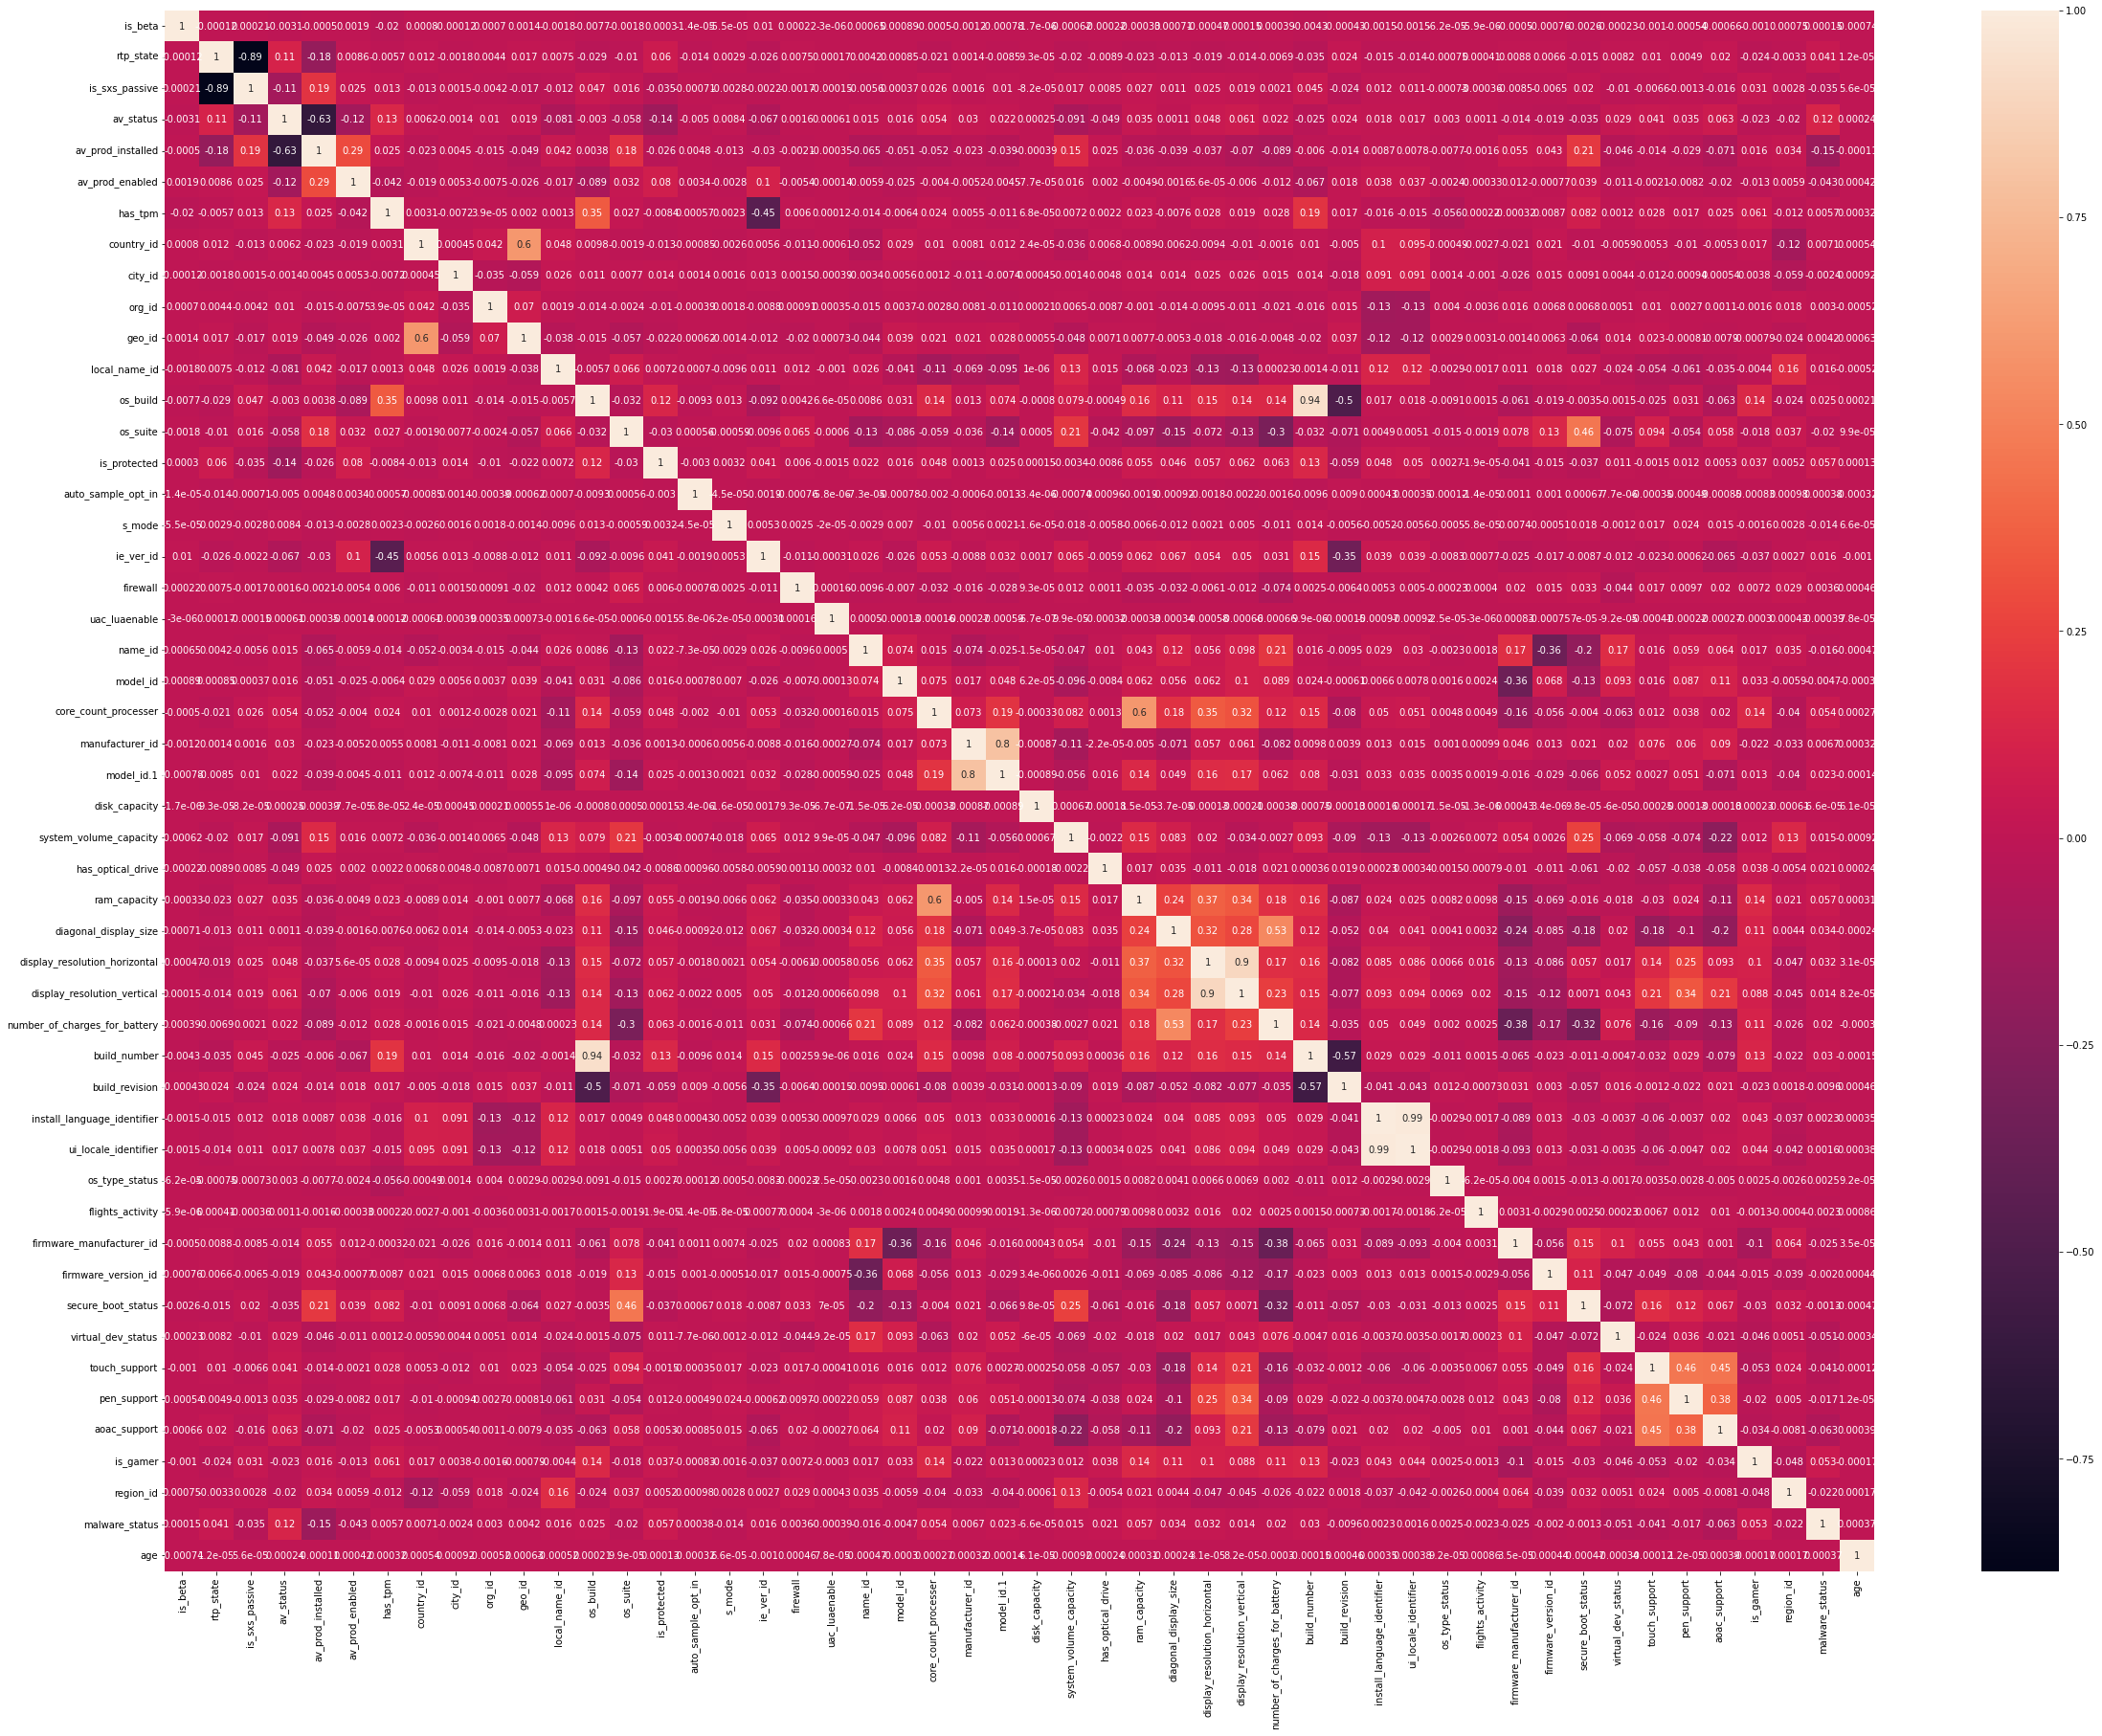

In [12]:
plt.figure(figsize=(40,30))
sns.heatmap(train_df.corr(),annot=True)

### Inference from Correlation Matrix:
- Among a pair of columns with high correlation, one of it dropped.

In [13]:
train_df.drop(['build_number','manufacturer_id','disk_capacity','display_resolution_vertical','display_resolution_horizontal','install_language_identifier'],axis = 1, inplace=True)
test_df.drop(['build_number','manufacturer_id','disk_capacity','display_resolution_vertical','display_resolution_horizontal','install_language_identifier'],axis = 1, inplace=True)

<AxesSubplot:>

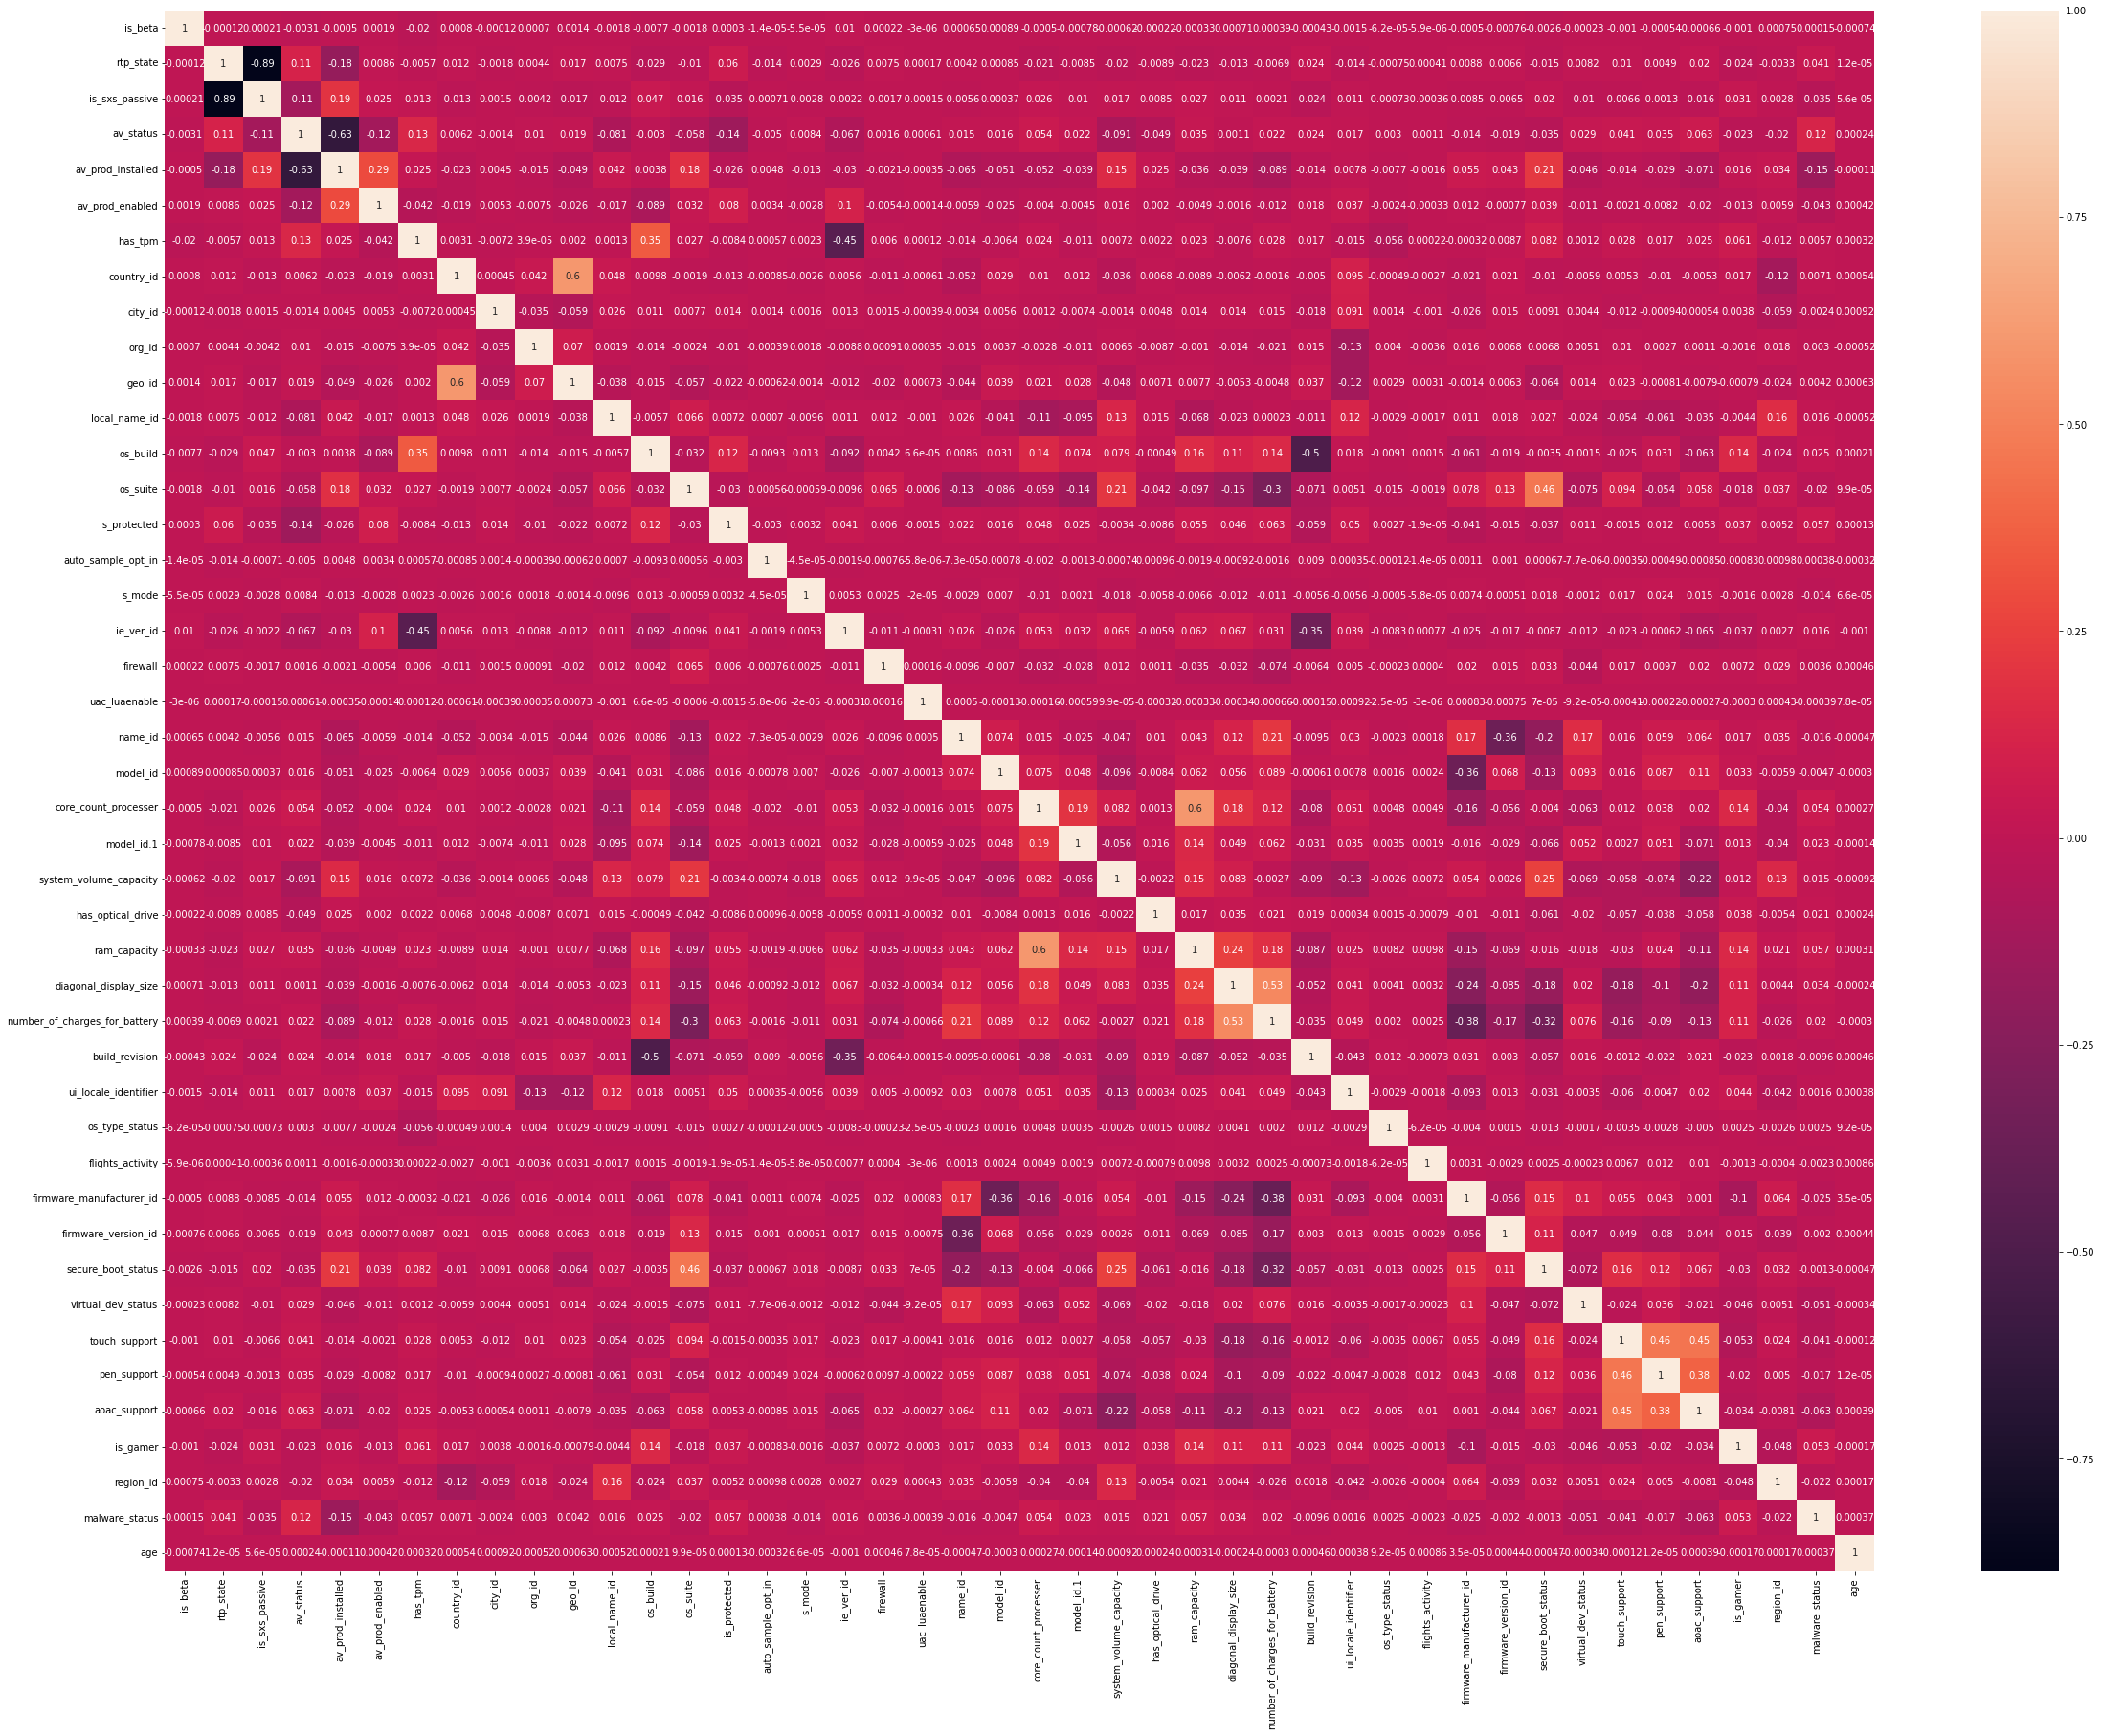

In [14]:
plt.figure(figsize=(40,30))
sns.heatmap(train_df.corr(),annot=True)

### Feature Engineering:
- Drop 'sex' and 'age' category, as they don't contribute to 

In [15]:
train_df.drop(['sex'],inplace=True,axis=1)
train_df.drop(['age'],inplace=True, axis =1)
train_df.drop(['diagonal_display_size'],inplace=True,axis=1)
train_df.drop(['org_id'],inplace=True,axis=1)
test_df.drop(['sex'],inplace=True,axis=1)
test_df.drop(['age'],inplace=True, axis =1)
test_df.drop(['diagonal_display_size'],inplace=True,axis=1)
test_df.drop(['org_id'],inplace=True,axis=1)


Column   -   no.of null values  -  no. of unique elts
rtp_state  -  17840  -  7
av_status  -  20244  -  20652
av_prod_installed  -  20244  -  7
av_prod_enabled  -  20244  -  6
city_id  -  181525  -  91150
is_protected  -  20154  -  2
s_mode  -  300417  -  2
ie_ver_id  -  32874  -  265
firewall  -  47617  -  2
uac_luaenable  -  6053  -  8
name_id  -  53286  -  3242
model_id  -  57044  -  134666
core_count_processer  -  22936  -  42
model_id.1  -  22959  -  3146
system_volume_capacity  -  29652  -  442378
ram_capacity  -  44875  -  2487
number_of_charges_for_battery  -  147065  -  29248
flights_activity  -  83311  -  2
firmware_manufacturer_id  -  102314  -  606
firmware_version_id  -  89353  -  44243
aoac_support  -  39264  -  2


d:\Software\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


is_gamer  -  164753  -  2
region_id  -  164753  -  15


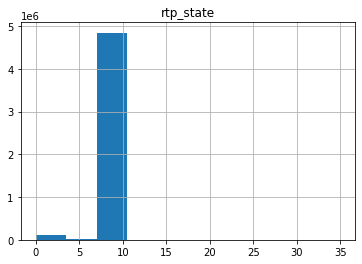

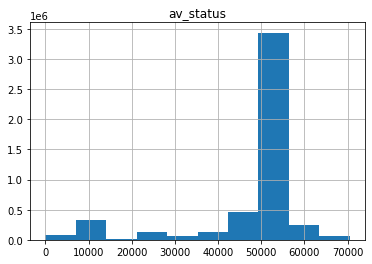

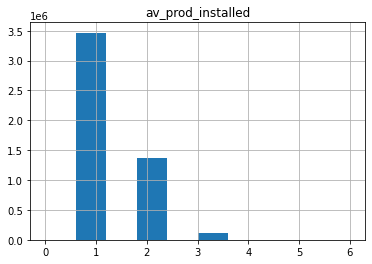

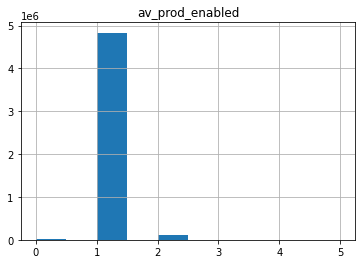

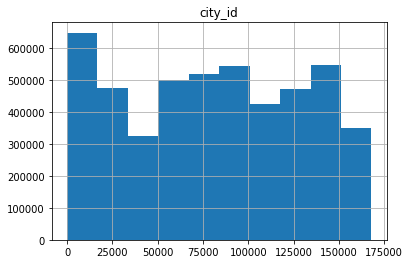

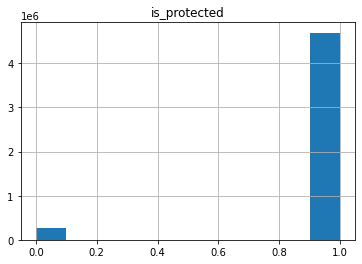

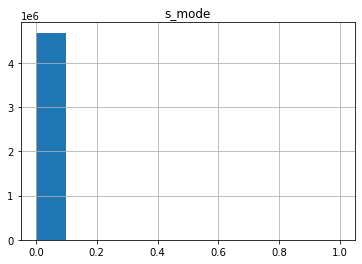

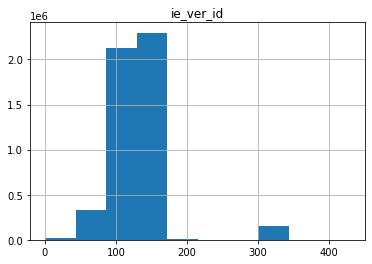

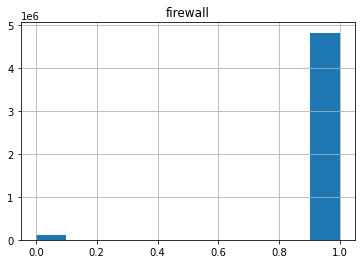

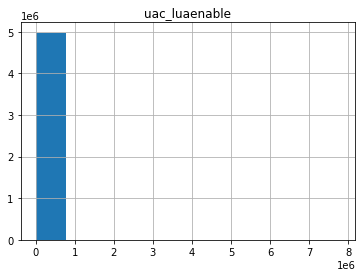

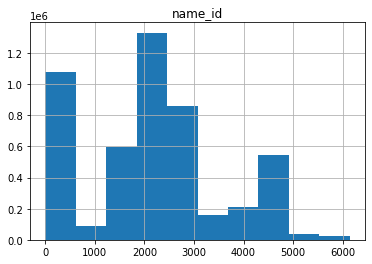

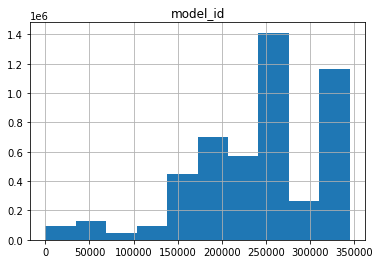

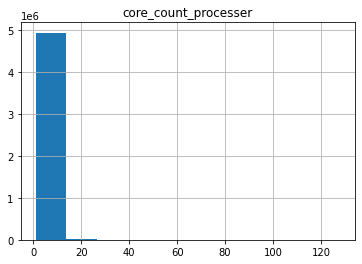

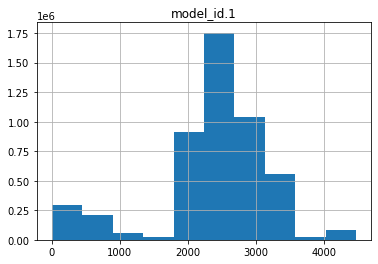

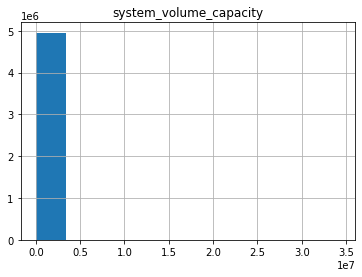

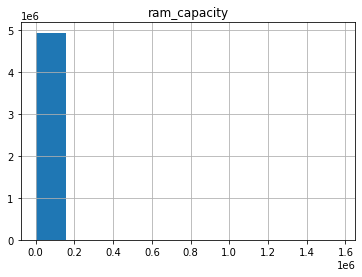

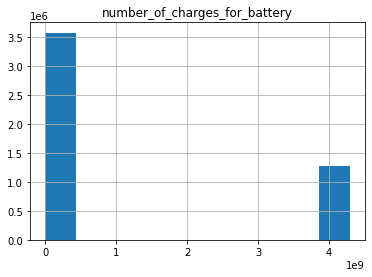

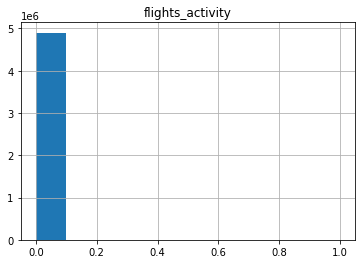

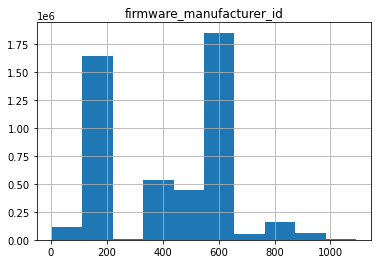

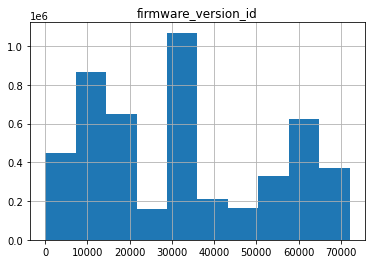

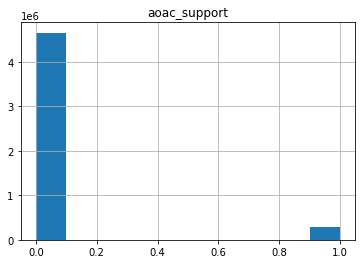

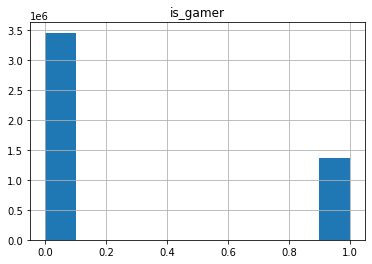

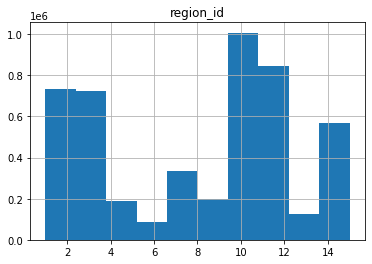

In [16]:
print("Column   -   no.of null values  -  no. of unique elts")
for i in train_df.columns:
    if train_df[i].isnull().sum() !=0:
        print(i," - ",train_df[i].isnull().sum()," - ",train_df[i].nunique())
        train_df.hist(i)

In [20]:
print("Column   -   no.of null values  -  no. of unique elts")
for i in test_df.columns:
    if test_df[i].isnull().sum() !=0:
        print(i," - ",test_df[i].isnull().sum()," - ",test_df[i].nunique())


Column   -   no.of null values  -  no. of unique elts
rtp_state  -  14195  -  7
av_status  -  15892  -  18076
av_prod_installed  -  15892  -  7
av_prod_enabled  -  15892  -  6
city_id  -  143383  -  84349
geo_id  -  104  -  288
os_build_lab  -  8  -  590
is_protected  -  15809  -  2
s_mode  -  236373  -  2
ie_ver_id  -  25918  -  254
firewall  -  40072  -  2
uac_luaenable  -  4732  -  10
name_id  -  41887  -  2970
model_id  -  44869  -  120197
core_count_processer  -  18135  -  39
model_id.1  -  18149  -  3015
disk_type  -  5696  -  4
system_volume_capacity  -  23208  -  404440
ram_capacity  -  35439  -  2069
chassis_type  -  277  -  43
power_profile  -  24  -  10
number_of_charges_for_battery  -  118123  -  25001
flights_activity  -  70351  -  2
firmware_manufacturer_id  -  80411  -  579
firmware_version_id  -  70260  -  41820
virtual_dev_status  -  6909  -  2
aoac_support  -  31429  -  2
is_gamer  -  132797  -  2
region_id  -  132797  -  15


### Fill Missing Categorical Data with Mode

In [21]:
for i in train_df.columns:
    if train_df[i].isnull().sum() !=0:
        train_df[i] = train_df[i].fillna(train_df[i].mode()[0])

for i in test_df.columns:
    if test_df[i].isnull().sum() !=0:
        test_df[i] = test_df[i].fillna(test_df[i].mode()[0])


In [22]:
train_df.to_csv("Cleaned_train_Data.csv")
test_df.to_csv("Cleaned_test_Data.csv")

In [1]:
train_df = pd.read_csv("Cleaned_train_Data.csv")
test_df = pd.read_csv("Cleaned_test_Data.csv")
# test_df = pd.read_csv("")
# train_df.info()

NameError: name 'pd' is not defined

### Getting the features and Target variable

In [ ]:
y_train = train_df['malware_status']
x_train = train_df[train_df.columns.difference(['malware_status'])]
x_train.drop(['Unnamed: 0'],inplace=True,axis=1)
test_df.drop(['Unnamed: 0'],inplace=True,axis=1)
x_train

C:\Users\reach\AppData\Local\Temp\ipykernel_2308\1215183737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.drop(['Unnamed: 0'],inplace=True,axis=1)


,activation_channel,aoac_support,app_version,architecture,auto_sample_opt_in,auto_update_opt,av_prod_enabled,av_prod_installed,av_sig_version,av_status,...,security_product_name,sku,sku_edition,state_name,system_volume_capacity,touch_support,uac_luaenable,ui_locale_identifier,version,virtual_dev_status
0,Retail,0.0,4.18.1806.18062,amd64,0,Notify,1.0,1.0,1.273.493.0,53447.0,...,win8defender,CORE,Home,IS_GENUINE,941970.0,0,1.0,31,10.0.16299.431,0.0
1,Retail,0.0,4.18.1807.18075,amd64,0,FullAuto,1.0,1.0,1.275.36.0,53447.0,...,win8defender,PROFESSIONAL,Pro,IS_GENUINE,204694.0,0,1.0,31,10.0.17134.228,0.0
2,Retail,0.0,4.18.1807.18075,amd64,0,FullAuto,1.0,1.0,1.275.26.0,53447.0,...,win8defender,PROFESSIONAL,Pro,IS_GENUINE,952489.0,0,1.0,34,10.0.17134.228,0.0
3,OEM:DM,0.0,4.18.1806.18062,amd64,0,UNKNOWN,1.0,1.0,1.273.241.0,53447.0,...,win8defender,CORE_SINGLELANGUAGE,Home,IS_GENUINE,938818.0,0,1.0,35,10.0.16299.431,0.0
4,OEM:DM,0.0,4.18.1807.18075,amd64,0,FullAuto,1.0,1.0,1.273.1749.0,53447.0,...,win8defender,PROFESSIONAL,Pro,IS_GENUINE,938667.0,0,1.0,35,10.0.17134.228,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983522,OEM:DM,0.0,4.18.1806.18062,amd64,0,FullAuto,1.0,1.0,1.271.545.0,53447.0,...,win8defender,CORE,Home,IS_GENUINE,940636.0,0,1.0,49,10.0.17134.228,0.0
4983523,Retail,0.0,4.10.209.0,amd64,0,FullAuto,1.0,1.0,1.273.1710.0,53447.0,...,win8defender,CORE,Home,IS_GENUINE,463129.0,1,1.0,49,10.0.10586.318,0.0
4983524,OEM:DM,0.0,4.9.10586.1106,amd64,0,Notify,1.0,2.0,1.273.912.0,46413.0,...,win8defender,CORE_SINGLELANGUAGE,Home,IS_GENUINE,431175.0,0,1.0,31,10.0.10586.1176,0.0
4983525,Volume:GVLK,0.0,4.18.1807.18075,amd64,0,FullAuto,1.0,2.0,1.273.1668.0,43856.0,...,win8defender,PROFESSIONAL,Pro,IS_GENUINE,118505.0,0,1.0,31,10.0.17134.165,0.0


### Encoding using LabelEncoder for Categorical Data

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
le = preprocessing.LabelEncoder()

In [ ]:
test_df.info()
machine_id = test_df['machine_id']
feature_set = test_df[test_df.columns.difference(['machine_id'])]

for i in feature_set.columns:
    if feature_set[i].isnull().sum() !=0:
        feature_set[i] = feature_set[i].fillna(feature_set[i].mode()[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921483 entries, 0 to 3921482
Data columns (total 66 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   machine_id                     int64  
 1   security_product_name          object 
 2   machine_version                object 
 3   app_version                    object 
 4   av_sig_version                 object 
 5   is_beta                        int64  
 6   rtp_state                      float64
 7   is_sxs_passive                 int64  
 8   av_status                      float64
 9   av_prod_installed              float64
 10  av_prod_enabled                float64
 11  has_tpm                        int64  
 12  country_id                     int64  
 13  city_id                        float64
 14  geo_id                         float64
 15  local_name_id                  int64  
 16  platform                       object 
 17  processor                      object 
 18  os

In [ ]:
for i in x_train.select_dtypes(['object']).columns:
        x_train[i] = le.fit_transform(x_train[i])

for i in feature_set.select_dtypes(['object']).columns:
        feature_set[i] = le.fit_transform(feature_set[i])


C:\Users\reach\AppData\Local\Temp\ipykernel_2308\2310260312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[i] = le.fit_transform(x_train[i])
C:\Users\reach\AppData\Local\Temp\ipykernel_2308\2310260312.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_set[i] = le.fit_transform(feature_set[i])


In [ ]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.3, random_state=10)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)
feature_set = scaler.transform(feature_set)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

In [ ]:
print(classification_report(y_val,xgb.predict(x_val)))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63    747811
           1       0.63      0.67      0.65    747248

    accuracy                           0.64   1495059
   macro avg       0.64      0.64      0.64   1495059
weighted avg       0.64      0.64      0.64   1495059



In [ ]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=10000, learning_rate=0.5, task_type='GPU',logging_level='Silent')
cat.fit(x_train,y_train)
print(classification_report(y_val,cat.predict(x_val)))

NameError: name 'x_train' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logisreg = LogisticRegression(random_state=30)
logisreg.fit(x_train,y_train)
y_pred_val = logisreg.predict(x_val)
accuracy_score(y_val,y_pred_val)

In [ ]:
print(classification_report(y_val,cat.predict(x_val)))

              precision    recall  f1-score   support

           0       0.65      0.62      0.63    747811
           1       0.63      0.66      0.65    747248

    accuracy                           0.64   1495059
   macro avg       0.64      0.64      0.64   1495059
weighted avg       0.64      0.64      0.64   1495059



In [ ]:
# for i in feature_set.columns:
#     print(i,feature_set[i].isnull().sum())



logisreg.predict(feature_set)

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import NuSVC


gb = GaussianNB()
bnb = BernoulliNB()
nsvc = NuSVC()

mgb = gb.fit(x_train,y_train)
print(mgb.score(x_val,y_val))
print(classification_report(mgb.predict(x_val),y_val))

In [ ]:
mbnb = bnb.fit(x_train,y_train)
print(mbnb.score(x_val,y_val))
print(classification_report(mbnb.predict(x_val),y_val))


In [ ]:
# Predict on test data
# data = {'machine_id':machine_id,
#         'malware_status':pd.Series(logisreg.predict(feature_set))}

# df = pd.concat(data, axis=1)
# df.to_csv("Prediction.csv",index=False)

In [ ]:
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
# from sklearn.utils import resample
# clf = make_pipeline(StandardScaler(), SVC(kernel = 'poly', gamma='auto'))
# x_train,y_train = resample(x_train,y_train, random_state=0)
# clf.fit(x_train[:100000], y_train[:100000])
# clf.score(x_val,y_val)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, random_state=10, n_estimators = 200)
clf.fit(x_train, y_train)
clf.score(x_val,y_val)

In [ ]:
classification_report(clf.predict(x_val),y_val)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train, y_train)
print(clf.score(x_val,y_val))
print(classification_report(clf.predict(x_val),y_val))

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

xgb_model = XGBClassifier()

gsearch = RandomizedSearchCV(estimator = xgb_model,
                        param_grid = param_tuning,                        
                        cv = 5,
                        n_jobs = -1,
                        verbose = 1)

gsearch.fit(x_train,y_train)

In [ ]:
accuracy_score(y_val,xgb.predict(x_val))